<a href="https://colab.research.google.com/github/ngmars/Siren-Detection-Ensemble-Learning/blob/main/CNN%20with%20img%20files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 1**
Using Convolutional Neural Network

Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/ML: Siren Detector")

Import Libraries

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

Load dataset

In [ ]:
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K_image.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.png,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.png,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.png,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.png,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.png,100263,68.5,72.500000,1,5,2,children_playing


Train and test set split

In [ ]:
from sklearn.model_selection import train_test_split

labels = np.array(df['classID'])
train_df, test_df = train_test_split(df, test_size=0.2, stratify=labels)

In [ ]:
def path_class(filename):
    excerpt = df[df['slice_file_name'] == filename]
    path_name = os.path.join('UrbanSound8K/image', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

**Preprocessing**

Convert images to numpy array and save

In [ ]:
train_image = []
for i in tqdm(train_df.slice_file_name):
    fullpath, label = path_class(i)
    img = image.load_img(fullpath, target_size=(32,32,1), color_mode="grayscale")
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)

100%|██████████| 6985/6985 [04:21<00:00, 26.76it/s]


In [ ]:
np.save('UrbanSound8K/X_train.npy', X_train)

In [ ]:
test_image = []
for i in tqdm(test_df.slice_file_name):
    fullpath, label = path_class(i)
    img = image.load_img(fullpath, target_size=(32,32,1), color_mode="grayscale")
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)

100%|██████████| 1747/1747 [10:35<00:00,  2.75it/s]


In [ ]:
np.save('UrbanSound8K/X_test.npy', X_test)

In [ ]:
y_train = train_df['classID'].values
y_train = to_categorical(y_train)
np.save('UrbanSound8K/y_train.npy', y_train)

y_test = test_df['classID'].values
y_test = to_categorical(y_test)
np.save('UrbanSound8K/y_test.npy', y_test)

Load the saved features

In [ ]:
X_train = np.load('UrbanSound8K/X_train.npy')
X_test = np.load('UrbanSound8K/X_test.npy')

In [ ]:
y_train = np.load('UrbanSound8K/y_train.npy')
y_test = np.load('UrbanSound8K/y_test.npy')

# The CNN Classifier

Model architecture was inspired from this [Pyimagesearch article](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)

Conv2D Layer of Keras

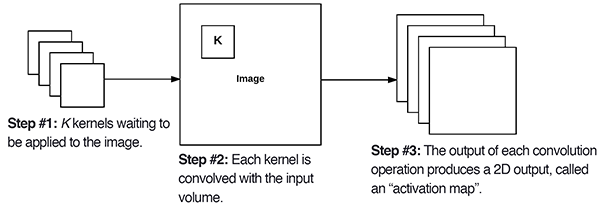

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(7, 7), activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

ValueError: ignored

Compile Model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer= "Adam", metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                401472    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

Add callbacks

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='my_model/classification_3.hdf5',
                            monitor='val_accuracy',
                            mode='max',
                            save_best_only=True,
                            verbose=1)

Train Model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
219/219 [==============================] - 2s 6ms/step - loss: 2.0725 - accuracy: 0.2151 - val_loss: 3.4504 - val_accuracy: 0.1030

Epoch 00001: val_accuracy improved from -inf to 0.10303, saving model to my_model/classification_3.hdf5
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3814 - accuracy: 0.5142 - val_loss: 4.1109 - val_accuracy: 0.1053

Epoch 00002: val_accuracy improved from 0.10303 to 0.10532, saving model to my_model/classification_3.hdf5
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.1605 - accuracy: 0.5894 - val_loss: 4.4851 - val_accuracy: 0.1179

Epoch 00003: val_accuracy improved from 0.10532 to 0.11792, saving model to my_model/classification_3.hdf5
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9975 - accuracy: 0.6532 - val_loss: 4.9558 - val_accuracy: 0.1122

Epoch 00004: val_accuracy did not improve from 0.11792
Epoch 5/100
219/219 [==============================

Performance evaluation

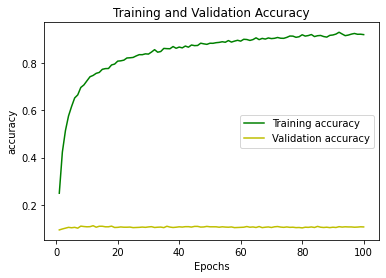

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'y', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

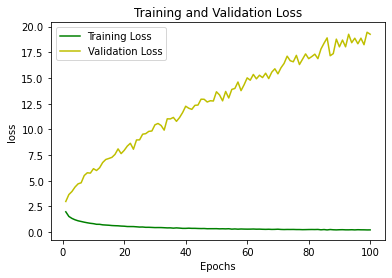

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Predict using model

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10       200
           1       0.02      0.02      0.02        86
           2       0.13      0.13      0.13       200
           3       0.13      0.13      0.13       200
           4       0.12      0.12      0.12       200
           5       0.11      0.11      0.11       200
           6       0.03      0.03      0.03        75
           7       0.10      0.10      0.10       200
           8       0.10      0.10      0.10       186
           9       0.13      0.14      0.13       200

    accuracy                           0.11      1747
   macro avg       0.10      0.10      0.10      1747
weighted avg       0.11      0.11      0.11      1747



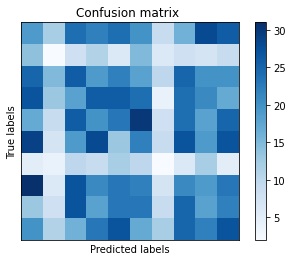

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()